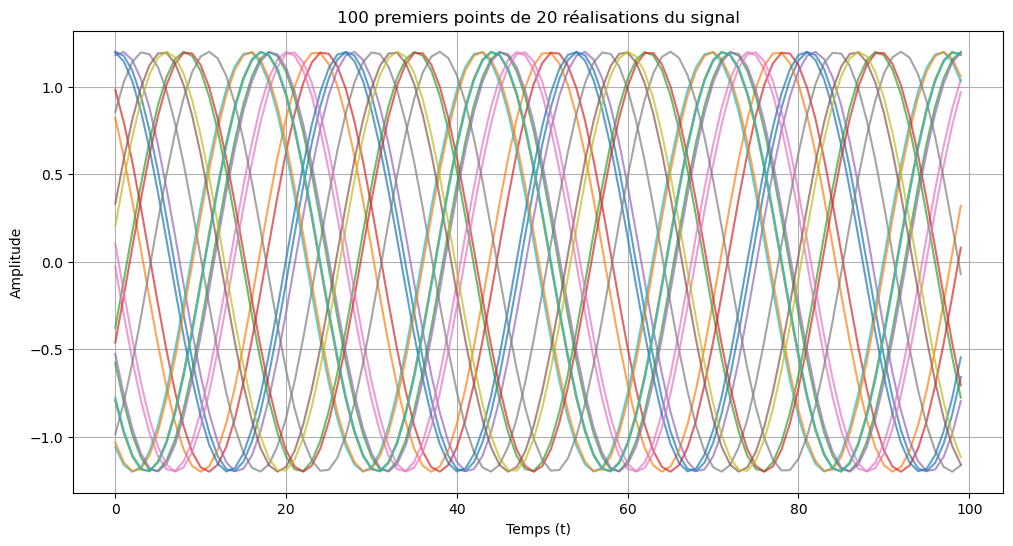

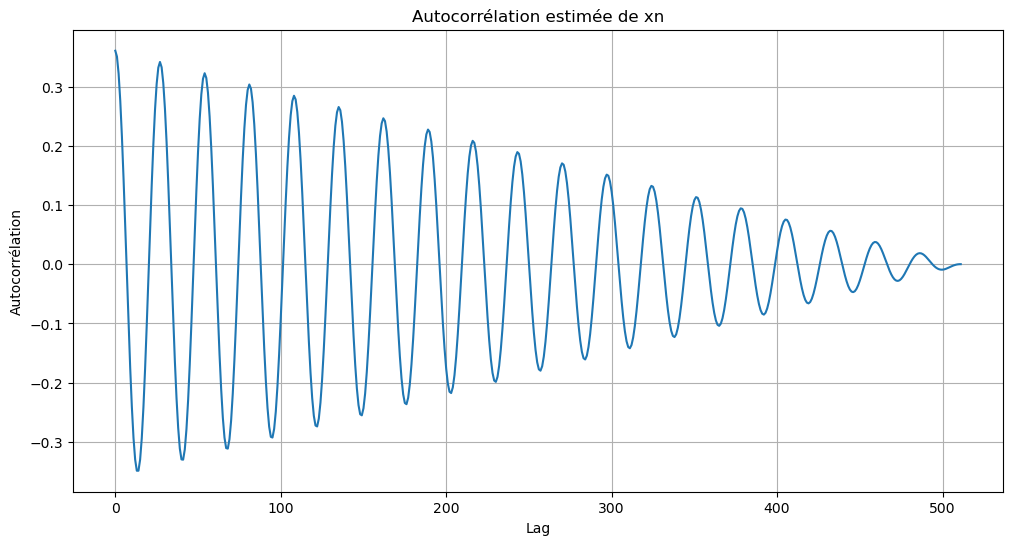

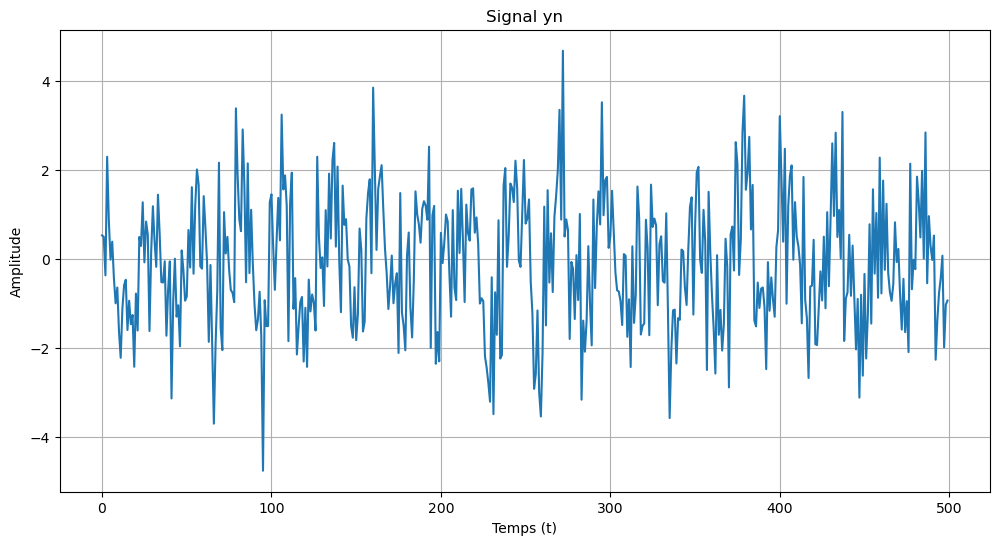

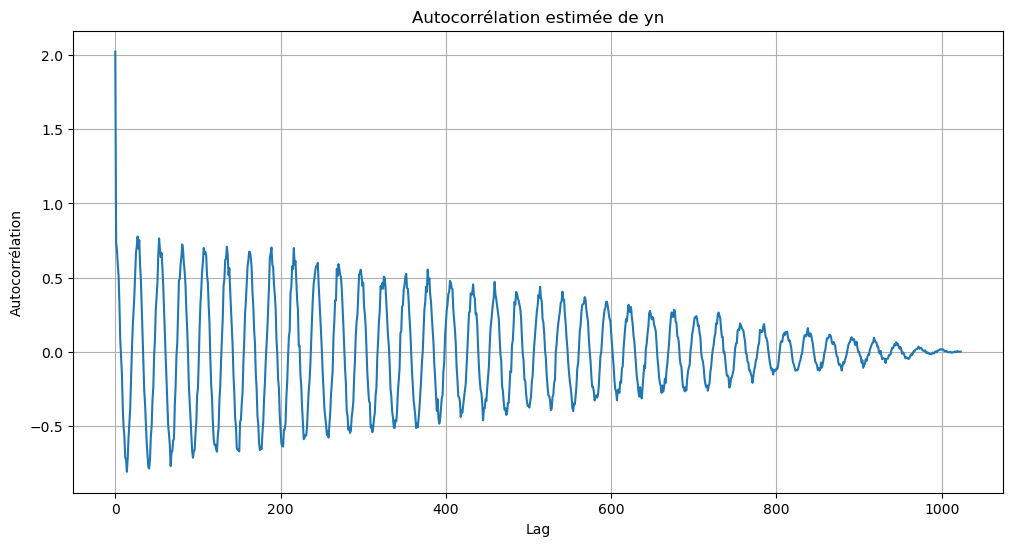

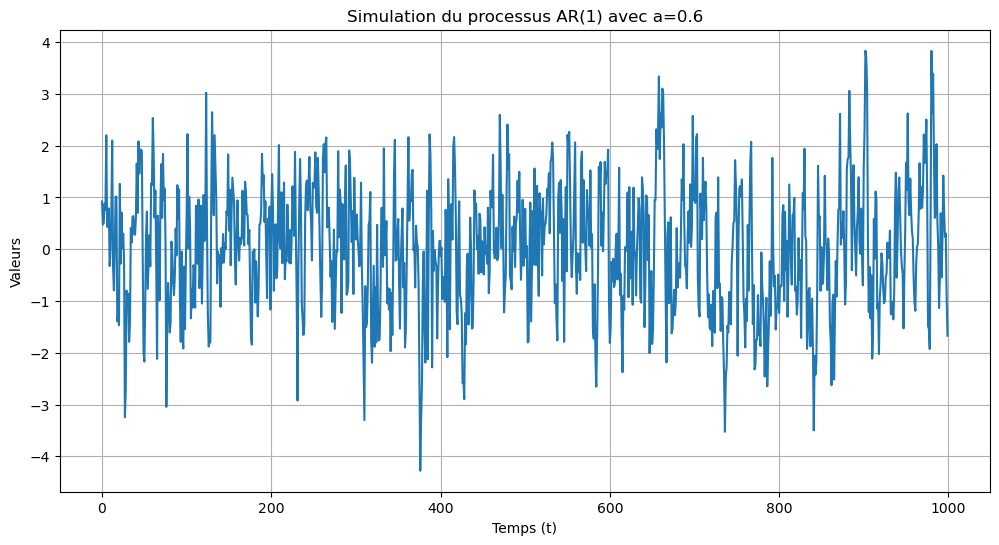

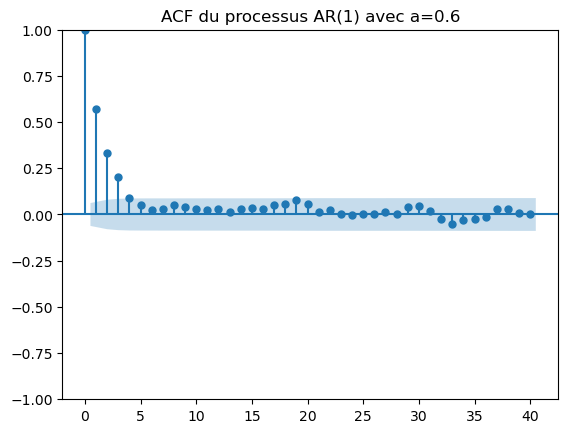

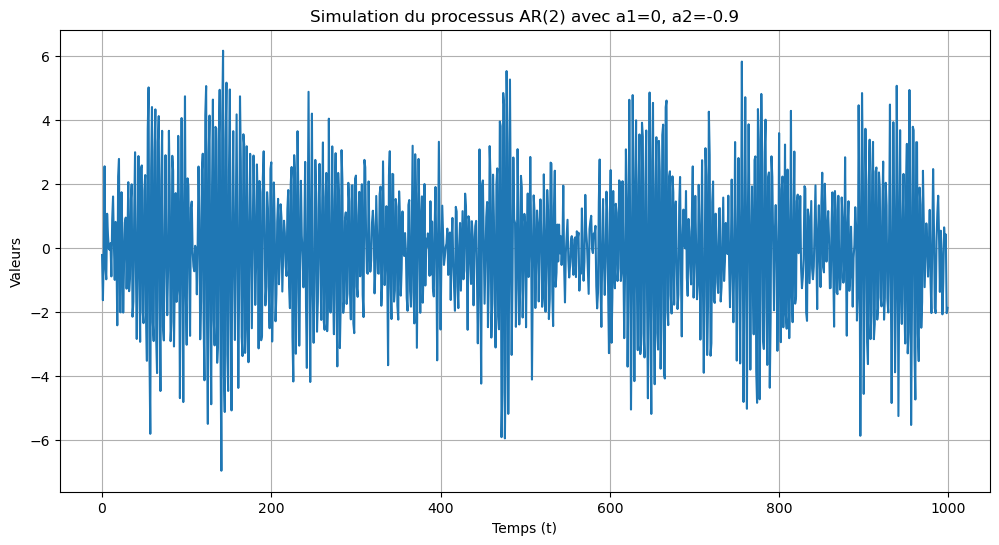

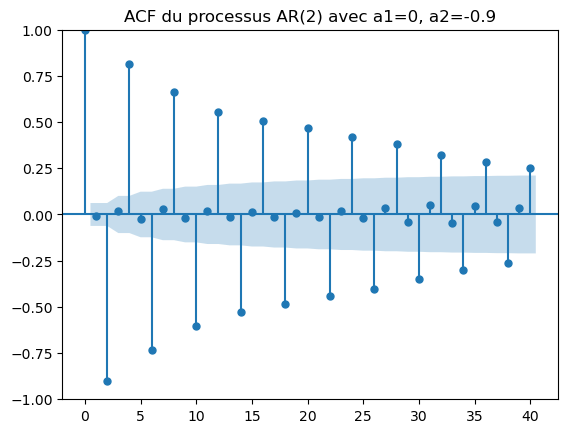

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess

# Définition des paramètres
N = 1024  # Nombre d'échantillons
A = 1.2
fo = 0.037

# Génération du bruit blanc Gaussien
bn = np.random.randn(N) * np.sqrt(1.2)

# Génération du signal xn
phases = np.random.uniform(0, 2 * np.pi, 20)
t = np.arange(512)
plt.figure(figsize=(12, 6))
for phase in phases:
    xn = A * np.cos(2 * np.pi * fo * t + phase)
    plt.plot(t[:100], xn[:100], alpha=0.7)
plt.xlabel('Temps (t)')
plt.ylabel('Amplitude')
plt.title('100 premiers points de 20 réalisations du signal')
plt.grid()
plt.show()

# Autocorrélation estimée de xn
acf_xn = np.correlate(xn, xn, mode='full') / N
plt.figure(figsize=(12, 6))
plt.plot(acf_xn[len(acf_xn)//2:])
plt.xlabel('Lag')
plt.ylabel('Autocorrélation')
plt.title("Autocorrélation estimée de xn")
plt.grid()
plt.show()

# Génération du signal yn = xn + bn
t = np.arange(N)
yn = A * np.cos(2 * np.pi * fo * t) + bn

# Tracé de yn
plt.figure(figsize=(12, 6))
plt.plot(t[:500], yn[:500])
plt.xlabel('Temps (t)')
plt.ylabel('Amplitude')
plt.title('Signal yn')
plt.grid()
plt.show()

# Autocorrélation estimée de yn
acf_yn = np.correlate(yn, yn, mode='full') / N
plt.figure(figsize=(12, 6))
plt.plot(acf_yn[len(acf_yn)//2:])
plt.xlabel('Lag')
plt.ylabel('Autocorrélation')
plt.title("Autocorrélation estimée de yn")
plt.grid()
plt.show()

# Simulation du processus AR(1) avec a = 0.6
ar1 = np.array([1, -0.6])
ma = np.array([1])
ar1_process = ArmaProcess(ar1, ma)
X_ar1 = ar1_process.generate_sample(nsample=1000)

plt.figure(figsize=(12, 6))
plt.plot(X_ar1)
plt.xlabel('Temps (t)')
plt.ylabel('Valeurs')
plt.title('Simulation du processus AR(1) avec a=0.6')
plt.grid()
plt.show()

# Tracé de l'ACF du processus AR(1)
sm.graphics.tsa.plot_acf(X_ar1, lags=40)
plt.title("ACF du processus AR(1) avec a=0.6")
plt.show()

# Simulation du processus AR(2) avec a1=0 et a2=-0.9
ar2 = np.array([1, 0, 0.9])
ma = np.array([1])
ar2_process = ArmaProcess(ar2, ma)
X_ar2 = ar2_process.generate_sample(nsample=1000)

plt.figure(figsize=(12, 6))
plt.plot(X_ar2)
plt.xlabel('Temps (t)')
plt.ylabel('Valeurs')
plt.title('Simulation du processus AR(2) avec a1=0, a2=-0.9')
plt.grid()
plt.show()

# Tracé de l'ACF du processus AR(2)
sm.graphics.tsa.plot_acf(X_ar2, lags=40)
plt.title("ACF du processus AR(2) avec a1=0, a2=-0.9")
plt.show()
